In [ ]:
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the datasets
train_df = pd.read_csv('/content/twitter_data/twitter_training.csv')
val_df = pd.read_csv('/content/twitter_data/twitter_validation.csv')

# Rename columns for consistency
train_df.columns = ['id', 'source', 'sentiment_label', 'text']
val_df.columns = ['id', 'source', 'sentiment_label', 'text']

# Display the first few rows of the datasets
print("Training Data:")
print(train_df.head())
print("\nValidation Data:")
print(val_df.head())


Training Data:
     id       source sentiment_label  \
0  2401  Borderlands        Positive   
1  2401  Borderlands        Positive   
2  2401  Borderlands        Positive   
3  2401  Borderlands        Positive   
4  2401  Borderlands        Positive   

                                                text  
0  I am coming to the borders and I will kill you...  
1  im getting on borderlands and i will kill you ...  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...  

Validation Data:
     id     source sentiment_label  \
0   352     Amazon         Neutral   
1  8312  Microsoft        Negative   
2  4371      CS-GO        Negative   
3  4433     Google         Neutral   
4  6273       FIFA        Negative   

                                                text  
0  BBC News - Amazon boss Jeff Bezos rejects clai...  
1  @Microsoft Why do I pay for WORD when it funct...  
2 

In [ ]:

import altair as alt

source_counts = train_df.groupby('source').size().reset_index(name='count')
chart = alt.Chart(source_counts).mark_bar().encode(
    x=alt.X('source', sort='-y'),
    y='count'
)
chart


/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [ ]:
val_df.head()

,id,source,sentiment_label,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [ ]:
import altair as alt

source_counts = val_df.groupby('source').size().reset_index(name='count')
chart = alt.Chart(source_counts).mark_bar().encode(
    x=alt.X('source', sort='-y'),
    y='count'
)
chart

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [ ]:
train_df.columns
val_df.columns

Index(['id', 'source', 'sentiment_label', 'text'], dtype='object')

In [ ]:
print('length of data is', len(train_df))
print('length of data is', len(val_df))

length of data is 74681
length of data is 999


In [ ]:
train_df. shape
val_df.shape

(999, 4)

In [ ]:
train_df.info()
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               74681 non-null  int64 
 1   source           74681 non-null  object
 2   sentiment_label  74681 non-null  object
 3   text             73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               999 non-null    int64 
 1   source           999 non-null    object
 2   sentiment_label  999 non-null    object
 3   text             999 non-null    object
dtypes: int64(1), object(3)
memory usage: 31.3+ KB


In [ ]:
np.sum(train_df.isnull().any(axis=1))

686

Number of rows with missing values in the training dataset: 686
Number of rows with missing values in the validation dataset: 0


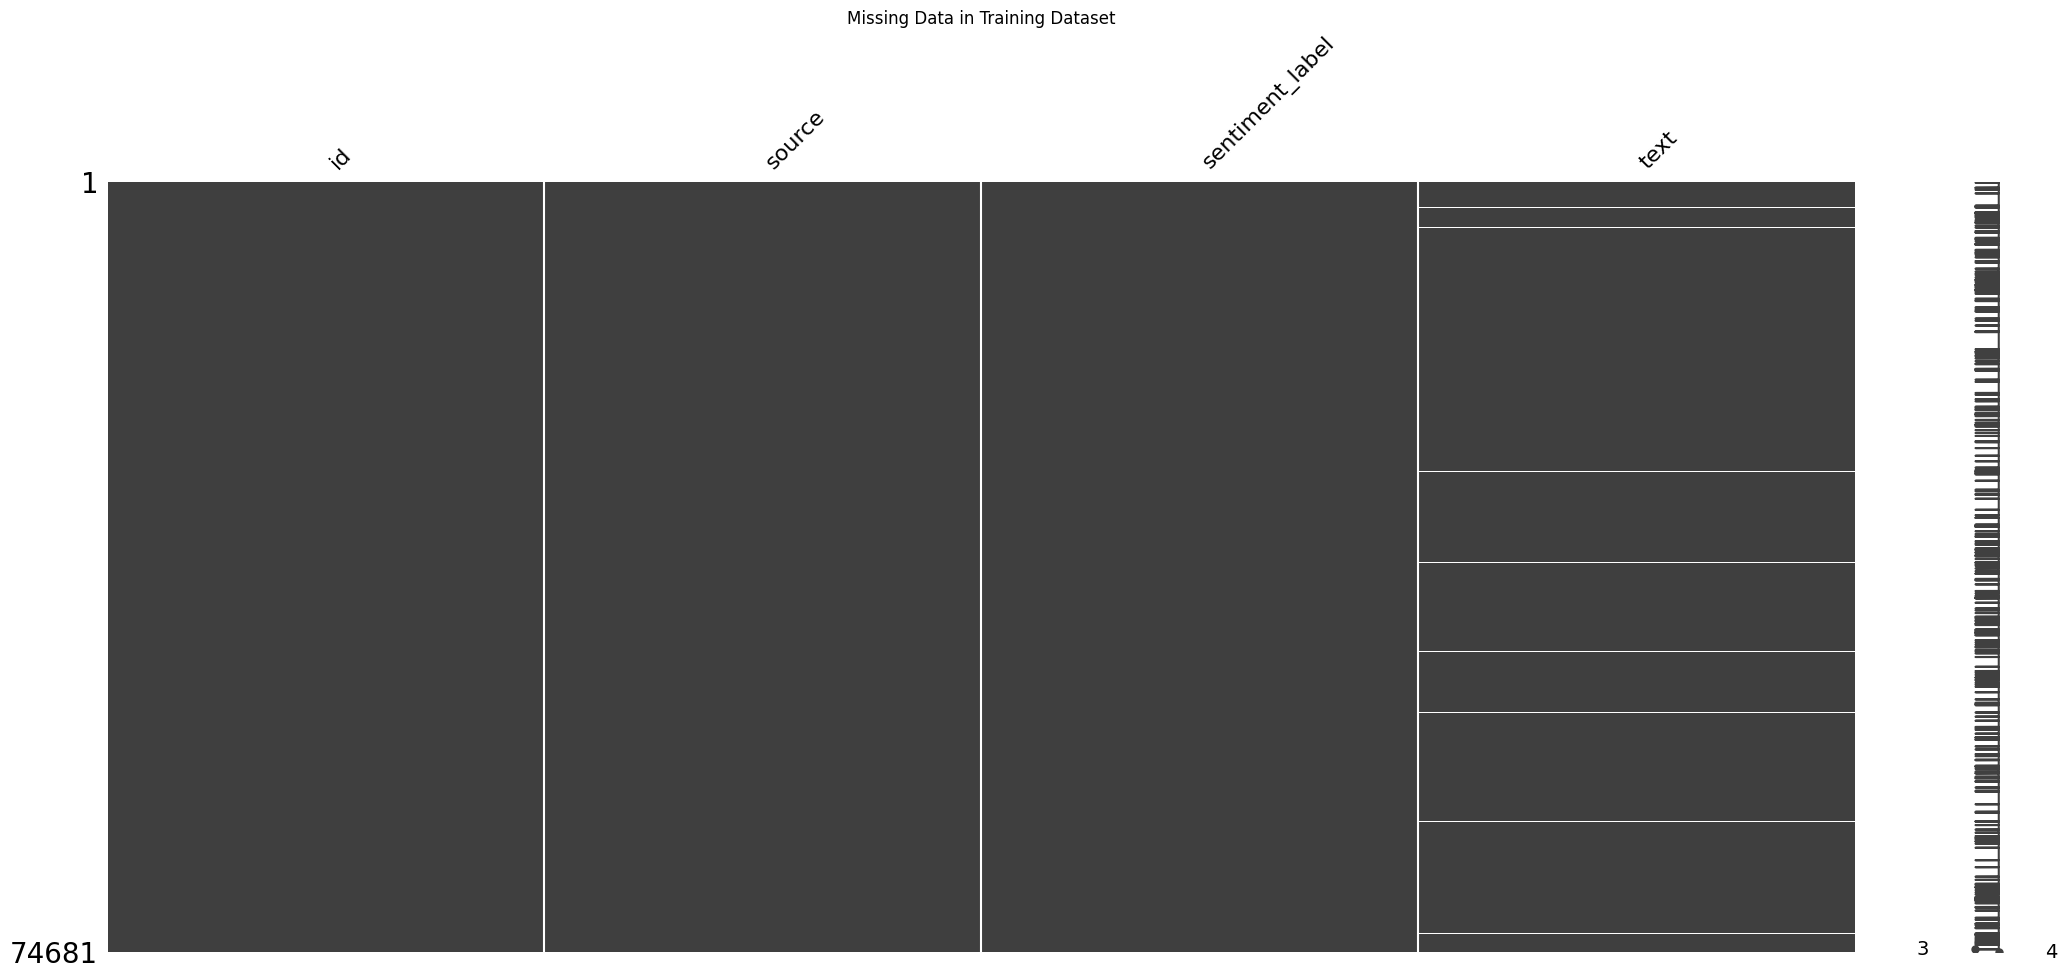

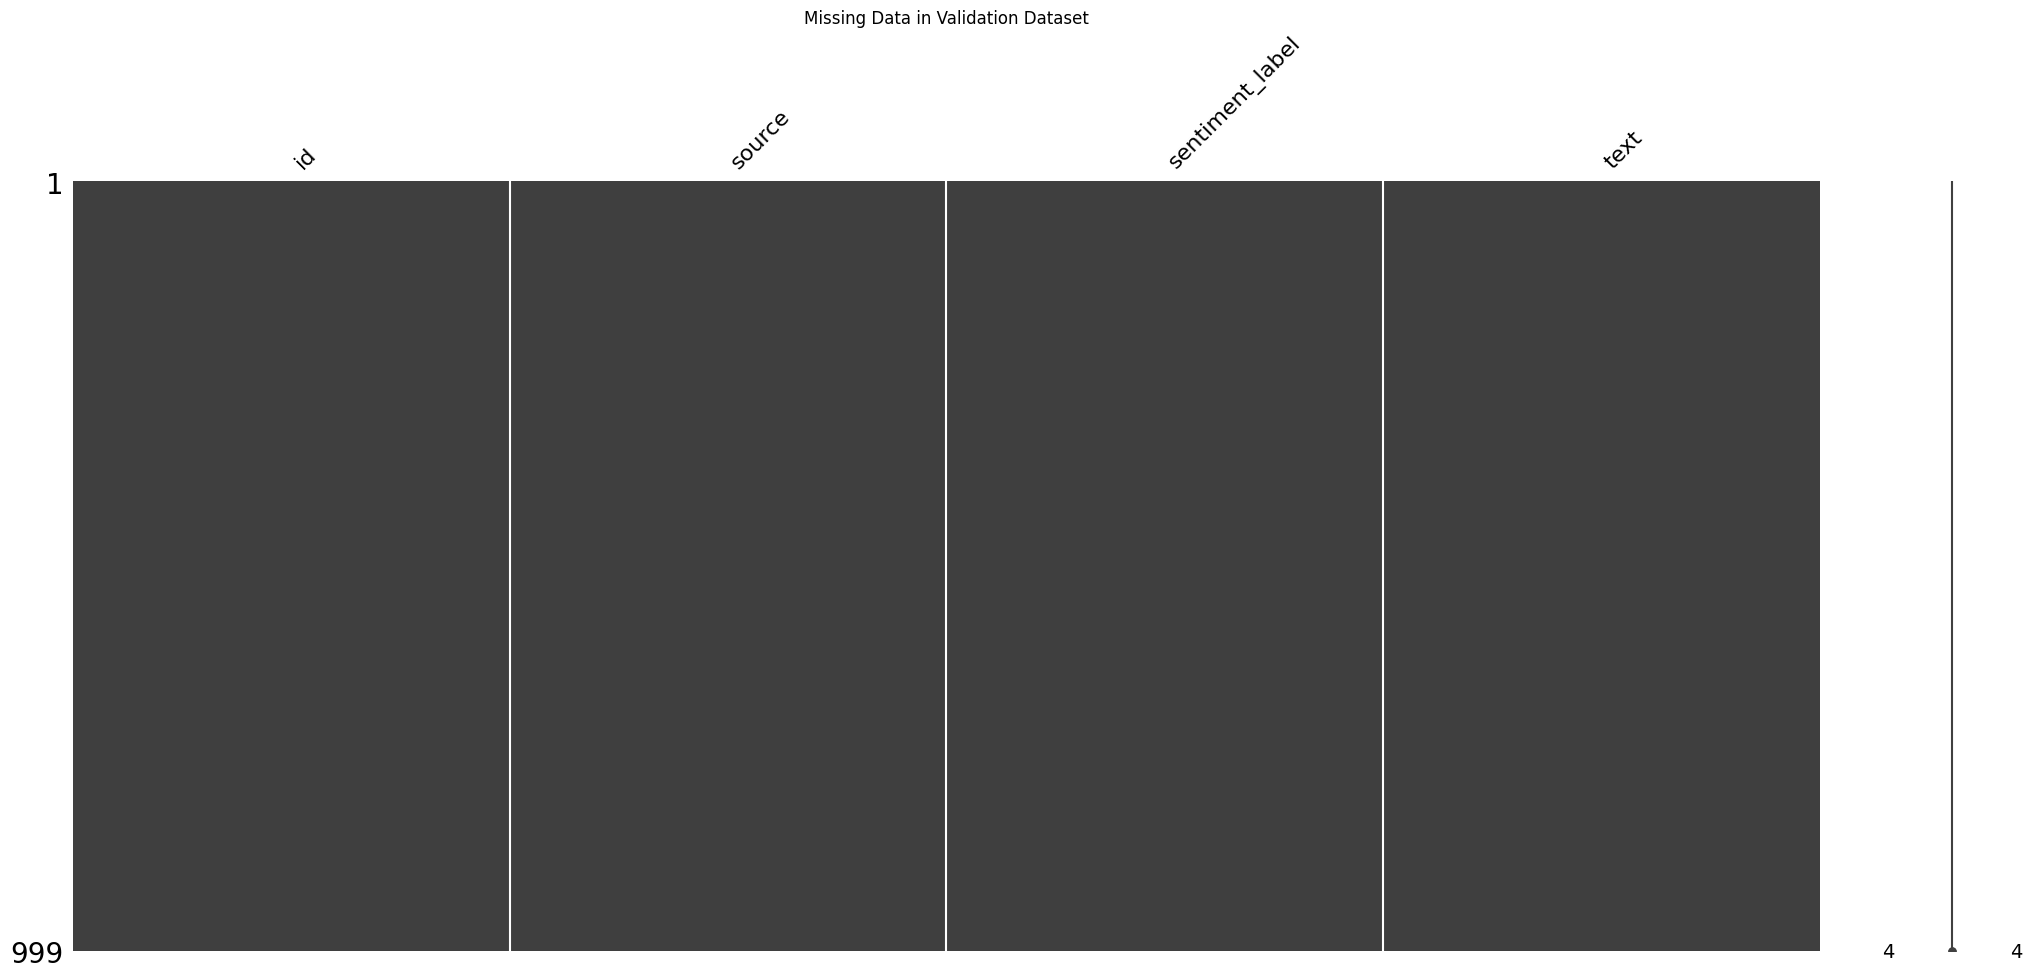

In [ ]:

missing_values_train = np.sum(train_df.isnull().any(axis=1))
print(f"Number of rows with missing values in the training dataset: {missing_values_train}")

missing_values_val = np.sum(val_df.isnull().any(axis=1))
print(f"Number of rows with missing values in the validation dataset: {missing_values_val}")


import missingno as msno

msno.matrix(train_df)
plt.title('Missing Data in Training Dataset')
plt.show()

msno.matrix(val_df)
plt.title('Missing Data in Validation Dataset')
plt.show()


['Positive' 'Neutral' 'Negative' 'Irrelevant']


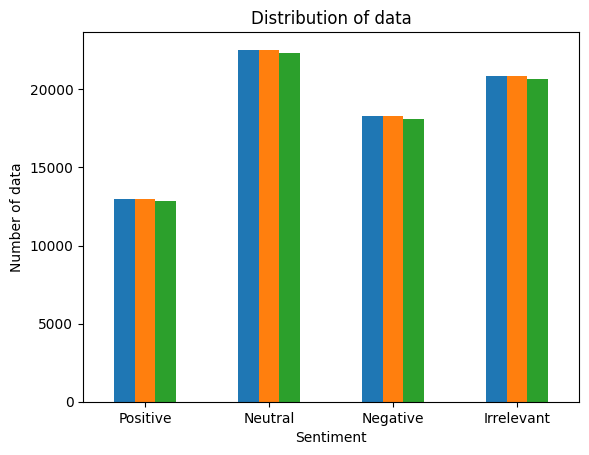

In [ ]:

ax = train_df.groupby('sentiment_label').count().plot(kind='bar', title='Distribution of data',legend=False)

ax.set_xlabel('Sentiment')

ax.set_ylabel('Number of data')
print(train_df['sentiment_label'].unique())

xtick_labels = train_df['sentiment_label'].unique()
ax.set_xticklabels(xtick_labels, rotation=0)
plt.show()
text, sentiment = list(train_df['text']), list(train_df['sentiment_label'])

['Neutral' 'Negative' 'Positive' 'Irrelevant']


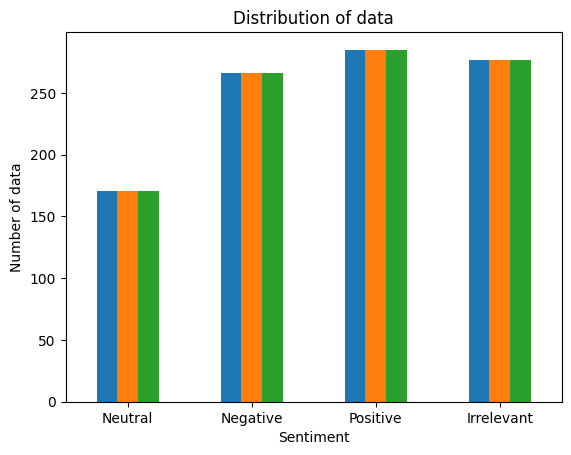

In [ ]:

ax = val_df.groupby('sentiment_label').count().plot(kind='bar', title='Distribution of data',legend=False)

ax.set_xlabel('Sentiment')

ax.set_ylabel('Number of data')
print(val_df['sentiment_label'].unique())

xtick_labels = val_df['sentiment_label'].unique()
ax.set_xticklabels(xtick_labels, rotation=0)
plt.show()
text, sentiment = list(val_df['text']), list(train_df['sentiment_label'])

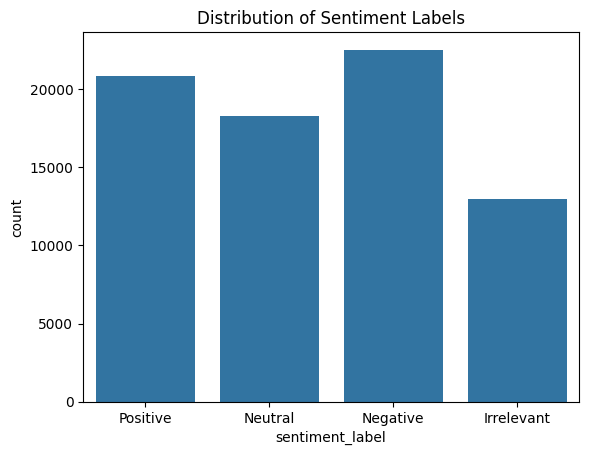

In [ ]:
import seaborn as sns
sns.countplot(x='sentiment_label', data=train_df)
plt.title('Distribution of Sentiment Labels')
plt.show()

Series([], Name: text, dtype: object)


<ipython-input-28-50bf684bc90c>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_label', data=val_df, palette='coolwarm')


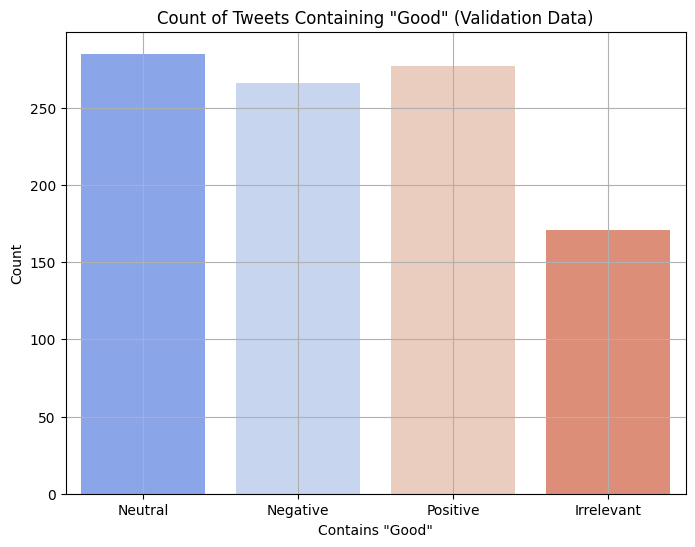

In [ ]:
data = train_df[['text', 'sentiment_label']]
data.loc[:, 'sentiment_label'] = data['sentiment_label'].replace({'positive': 1, 'negative': 0, 'neutral': 2})

# Select positive and negative samples
data_pos = data[data['sentiment_label'] == 1]
data_neg = data[data['sentiment_label'] == 0]

# Sample 20,000 from each
data_pos_sample = data_pos.iloc[:20000]
data_neg_sample = data_neg.iloc[:20000]

# Combine and shuffle
dataset = pd.concat([data_pos_sample, data_neg_sample])
dataset = dataset.sample(frac=1).reset_index(drop=True)

# Process text for analysis
dataset['text'] = dataset['text'].str.lower()
print(dataset['text'].tail())

plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_label', data=val_df, palette='coolwarm')
plt.xlabel('Contains "Good"')
plt.ylabel('Count')
plt.title('Count of Tweets Containing "Good" (Validation Data)')
plt.grid(True)
plt.show()
# Export analysis results
train_df.to_csv('train_analysis_results.csv', index=False)
val_df.to_csv('val_analysis_results.csv', index=False)

In [ ]:
pip install matplotlib wordcloud


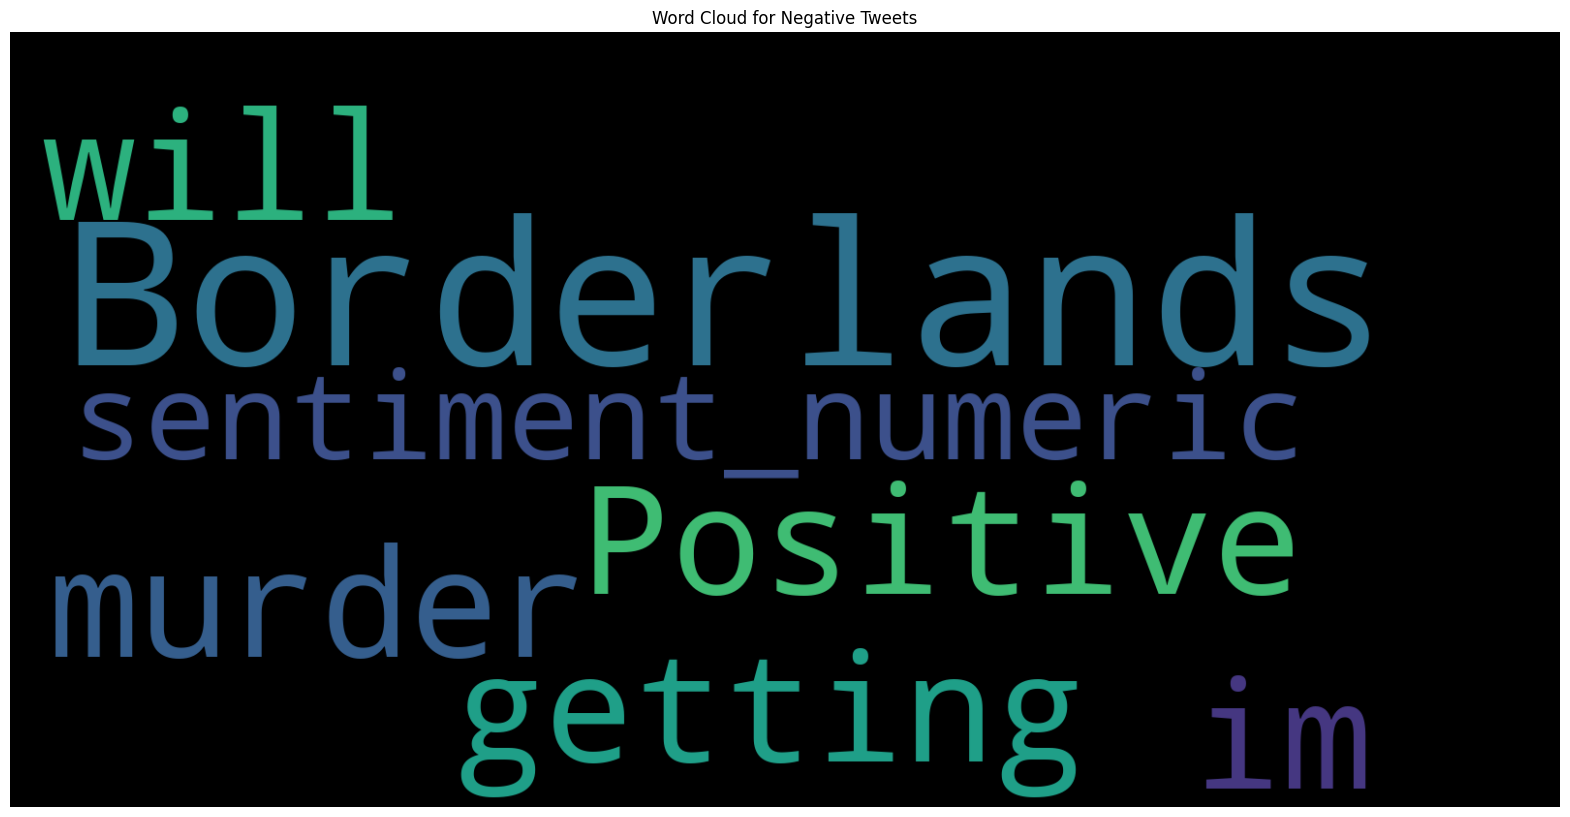

   sentiment_numeric
0                  0
1                  0
2                  0
3                  0
4                  0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load your DataFrame with tweet texts and sentiment scores
train_df = pd.read_csv('/content/twitter_data/twitter_training.csv')  # Adjust path if needed

# Classify sentiments based on sentiment scores
train_df['sentiment_numeric'] = -1
train_df['sentiment_numeric'] = 1
train_df['sentiment_numeric'] = 0

negative_tweets = train_df[train_df['sentiment_numeric'] == 'negative']
negative_tweets_sample = negative_tweets.iloc[:800000]

plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=1000, width=1600, height=800, collocations=False, background_color='black').generate(" ".join(negative_tweets_sample))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Tweets')
plt.show()

# Print the DataFrame to show the sentiment labels and numeric values
print(train_df[[ 'sentiment_numeric']].head())





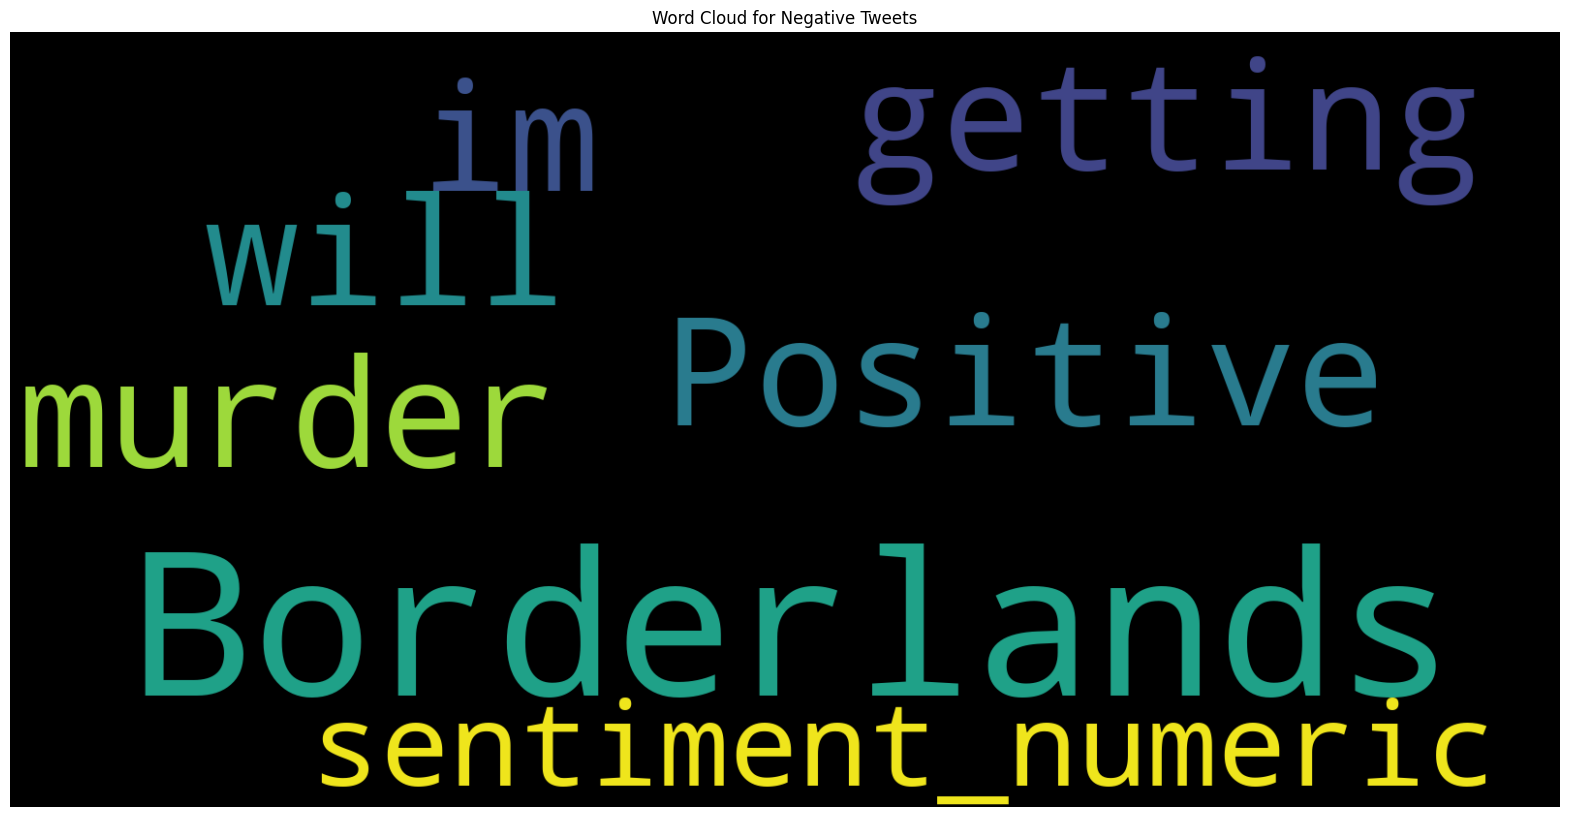

   sentiment_numeric
0                  1
1                  1
2                  1
3                  1
4                  1


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load your DataFrame with tweet texts and sentiment scores
train_df = pd.read_csv('/content/twitter_data/twitter_training.csv')  # Adjust path if needed

# Classify sentiments based on sentiment scores

train_df['sentiment_numeric'] = 1


negative_tweets = train_df[train_df['sentiment_numeric'] == 'postive']
negative_tweets_sample = negative_tweets.iloc[:800000]

plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=1000, width=1600, height=800, collocations=False, background_color='black').generate(" ".join(negative_tweets_sample))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Tweets')
plt.show()

# Print the DataFrame to show the sentiment labels and numeric values
print(train_df[[ 'sentiment_numeric']].head())





In [ ]:
import re
import pandas as pd

# Function to clean tweet text
def clean_tweet(text):
    if not isinstance(text, str):  # Check if text is a string
        return ''  # Return an empty string for non-string values
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)     # Remove mentions
    text = re.sub(r'#', '', text)        # Remove hashtags
    text = re.sub(r'\W', ' ', text)      # Remove special characters
    text = re.sub(r'\s+', ' ', text)     # Remove extra spaces
    return text.strip()

# Apply cleaning function
train_df['clean_text'] = train_df['text'].apply(clean_tweet)
val_df['clean_text'] = val_df['text'].apply(clean_tweet)
print(train_df)



         id       source sentiment_label  \
0      2401  Borderlands        Positive   
1      2401  Borderlands        Positive   
2      2401  Borderlands        Positive   
3      2401  Borderlands        Positive   
4      2401  Borderlands        Positive   
...     ...          ...             ...   
74676  9200       Nvidia        Positive   
74677  9200       Nvidia        Positive   
74678  9200       Nvidia        Positive   
74679  9200       Nvidia        Positive   
74680  9200       Nvidia        Positive   

                                                    text  \
0      I am coming to the borders and I will kill you...   
1      im getting on borderlands and i will kill you ...   
2      im coming on borderlands and i will murder you...   
3      im getting on borderlands 2 and i will murder ...   
4      im getting into borderlands and i can murder y...   
...                                                  ...   
74676  Just realized that the Windows partition of 

In [ ]:
from textblob import TextBlob

# Function to get sentiment
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

train_df['sentiment'] = train_df['clean_text'].apply(get_sentiment)

print(train_df)

         id       source sentiment_label  \
0      2401  Borderlands        Positive   
1      2401  Borderlands        Positive   
2      2401  Borderlands        Positive   
3      2401  Borderlands        Positive   
4      2401  Borderlands        Positive   
...     ...          ...             ...   
74676  9200       Nvidia        Positive   
74677  9200       Nvidia        Positive   
74678  9200       Nvidia        Positive   
74679  9200       Nvidia        Positive   
74680  9200       Nvidia        Positive   

                                                    text  \
0      I am coming to the borders and I will kill you...   
1      im getting on borderlands and i will kill you ...   
2      im coming on borderlands and i will murder you...   
3      im getting on borderlands 2 and i will murder ...   
4      im getting into borderlands and i can murder y...   
...                                                  ...   
74676  Just realized that the Windows partition of 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load your DataFrame from the CSV files
train_file_path = '/content/train_analysis_results.csv'
val_file_path = '/content/val_analysis_results.csv'

# Read the CSV files
train_df = pd.read_csv(train_file_path)
val_df = pd.read_csv(val_file_path)

# Combine both dataframes if needed
df = pd.concat([train_df, val_df], ignore_index=True)

# Classify sentiments based on sentiment scores
df['sentiment_label'] = df['sentiment_label'].apply(
    lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral')
)

# Map sentiment labels to numeric values
sentiment_mapping = {'positive': 1, 'negative': -1, 'neutral': 0}
df['sentiment_numeric'] = df['sentiment_label'].map(sentiment_mapping)

# Ensure the text column is correctly referenced
text_column = 'text'  # Update this to the correct column name if needed

# Extract tweets based on sentiment
positive_tweets = df[df['sentiment_label'] == 'positive'][text_column]
negative_tweets = df[df['sentiment_label'] == 'negative'][text_column]
neutral_tweets = df[df['sentiment_label'] == 'neutral'][text_column]

# Generate and plot the word cloud for positive tweets
plt.figure(figsize=(20, 10))
wc_positive = WordCloud(max_words=1000, width=1600, height=800, collocations=False, background_color='black').generate(" ".join(positive_tweets))
plt.imshow(wc_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Tweets')
plt.show()

# Generate and plot the word cloud for negative tweets
plt.figure(figsize=(20, 10))
wc_negative = WordCloud(max_words=1000, width=1600, height=800, collocations=False, background_color='black').generate(" ".join(negative_tweets))
plt.imshow(wc_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Tweets')
plt.show()

# Generate and plot the word cloud for neutral tweets
plt.figure(figsize=(20, 10))
wc_neutral = WordCloud(max_words=1000, width=1600, height=800, collocations=False, background_color='black').generate(" ".join(neutral_tweets))
plt.imshow(wc_neutral, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Neutral Tweets')
plt.show()


TypeError: '>' not supported between instances of 'str' and 'int'

In [ ]:
print("Column names:", df.columns)
print("Unique values in sentiment_label:", df['sentiment_label'].unique())

Column names: Index(['id', 'source', 'sentiment_label', 'text', 'sentiment_numeric'], dtype='object')
Unique values in sentiment_label: ['Positive' 'Neutral' 'Negative' 'Irrelevant']


In [ ]:
sentiment_mapping = {'positive': 1, 'negative': -1, 'neutral': 0}
df['sentiment_numeric'] = df['sentiment_label'].map(sentiment_mapping)
print(sentiment_mapping)

{'positive': 1, 'negative': -1, 'neutral': 0}


In [ ]:
text_column = 'text'  # Update this to the correct column name if needed
positive_tweets = df[df['sentiment_label'] == 'positive'][text_column]
negative_tweets = df[df['sentiment_label'] == 'negative'][text_column]
neutral_tweets = df[df['sentiment_label'] == 'neutral'][text_column]

In [ ]:
print("Number of positive tweets:", len(positive_tweets))
print("Number of negative tweets:", len(negative_tweets))
print("Number of neutral tweets:", len(neutral_tweets))

Number of positive tweets: 0
Number of negative tweets: 0
Number of neutral tweets: 0


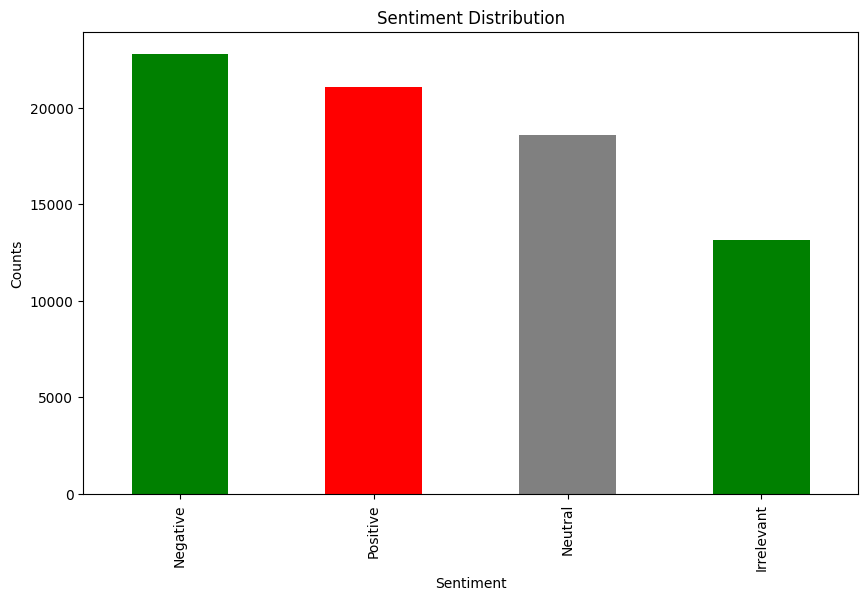

In [ ]:
sentiment_counts = df['sentiment_label'].value_counts()
plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.show()

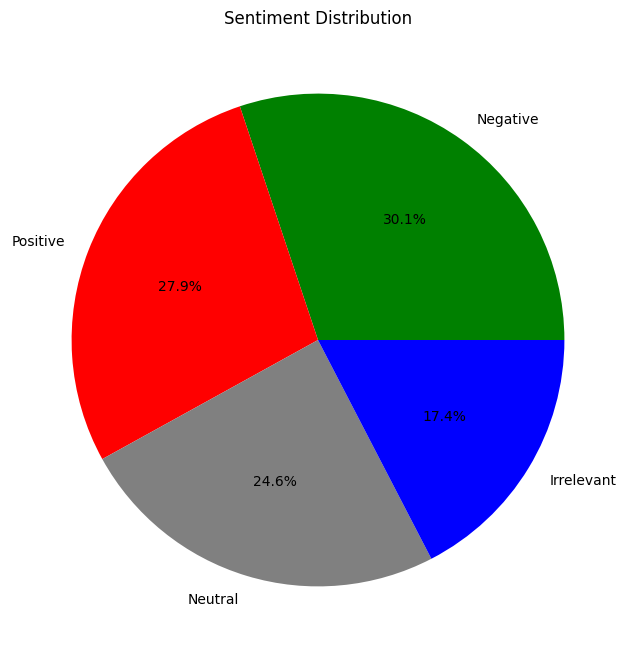

In [ ]:
plt.figure(figsize=(8, 8))
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red', 'gray','blue'])
plt.title('Sentiment Distribution')
plt.ylabel('')
plt.show()

In [ ]:
if len(positive_tweets) > 0:
    plt.figure(figsize=(20, 10))
    wc_positive = WordCloud(max_words=1000, width=1600, height=800, collocations=False, background_color='black').generate(" ".join(positive_tweets))
    plt.imshow(wc_positive, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud for Positive Tweets')
    plt.show()
else:
    print("No positive tweets to display.")

# Generate and plot the word cloud for negative tweets
if len(negative_tweets) > 0:
    plt.figure(figsize=(20, 10))
    wc_negative = WordCloud(max_words=1000, width=1600, height=800, collocations=False, background_color='black').generate(" ".join(negative_tweets))
    plt.imshow(wc_negative, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud for Negative Tweets')
    plt.show()
else:
    print("No negative tweets to display.")

# Generate and plot the word cloud for neutral tweets
if len(neutral_tweets) > 0:
    plt.figure(figsize=(20, 10))
    wc_neutral = WordCloud(max_words=1000, width=1600, height=800, collocations=False, background_color='black').generate(" ".join(neutral_tweets))
    plt.imshow(wc_neutral, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud for Neutral Tweets')
    plt.show()
else:
    print("No neutral tweets to display.")

No positive tweets to display.
No negative tweets to display.
No neutral tweets to display.
